In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

# EDA

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7650 non-null   object
 1   hour    7650 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.7+ KB


In [7]:
train

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81
...,...,...,...
18242,2021-02-28,19,95
18243,2021-02-28,20,88
18244,2021-02-28,21,39
18245,2021-02-28,22,104


In [8]:
test

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5
...,...,...
7645,2022-03-28,19
7646,2022-03-28,20
7647,2022-03-28,21
7648,2022-03-28,22


In [9]:
train.duplicated(subset=['date', 'hour']).sum()

0

In [10]:
train['date_hour'] = pd.to_datetime(train['date'] + '-' + train['hour'].apply(str), format='%Y-%m-%d-%H')

In [11]:
train['date'] = pd.to_datetime(train['date'])

In [12]:
test['date_hour'] = pd.to_datetime(test['date'] + '-' + test['hour'].apply(str), format='%Y-%m-%d-%H')

In [13]:
test['date'] = pd.to_datetime(test['date'])

<AxesSubplot:xlabel='date', ylabel='demand'>

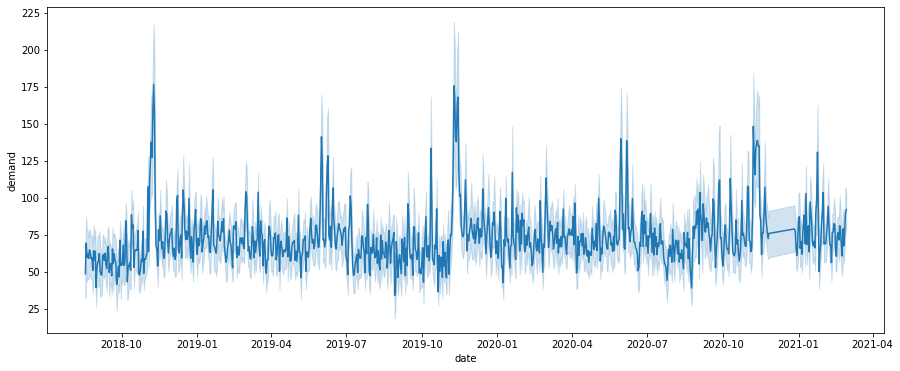

In [14]:
plt.figure(figsize=(15,6))
sns.lineplot(data=train, x='date', y='demand')

<AxesSubplot:xlabel='hour', ylabel='demand'>

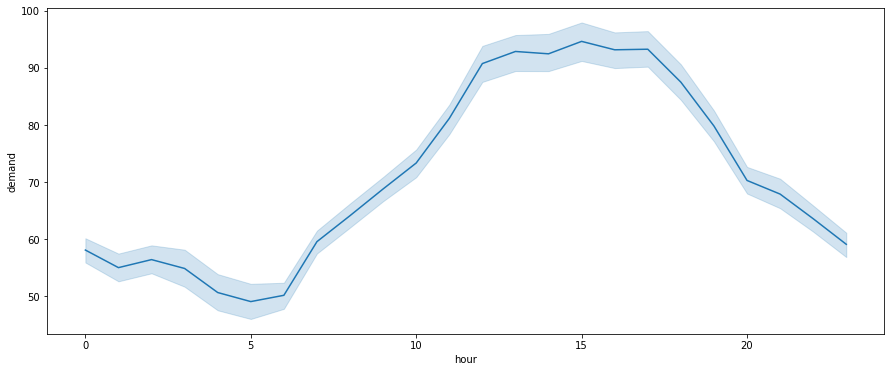

In [15]:
plt.figure(figsize=(15,6))
sns.lineplot(data=train, x='hour', y='demand')

## group by date

In [16]:
by_date = train.groupby('date').agg({'date':'count','hour':'count', 'demand':'mean'})

In [17]:
by_date

,date,hour,demand
date,,,
2018-08-18,13,13,48.615385
2018-08-19,15,15,69.333333
2018-08-20,14,14,59.642857
2018-08-21,15,15,62.133333
2018-08-22,16,16,59.000000
...,...,...,...
2021-02-24,21,21,79.000000
2021-02-25,21,21,67.476190
2021-02-26,24,24,75.500000


### mean demand

<AxesSubplot:xlabel='date', ylabel='demand'>

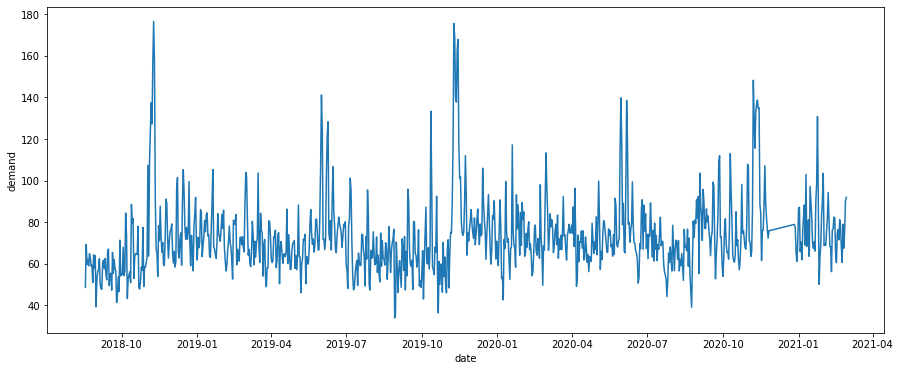

In [18]:
plt.figure(figsize=(15,6))
sns.lineplot(data=by_date, x=by_date.index, y='demand')

### count of hours

<AxesSubplot:xlabel='date', ylabel='hour'>

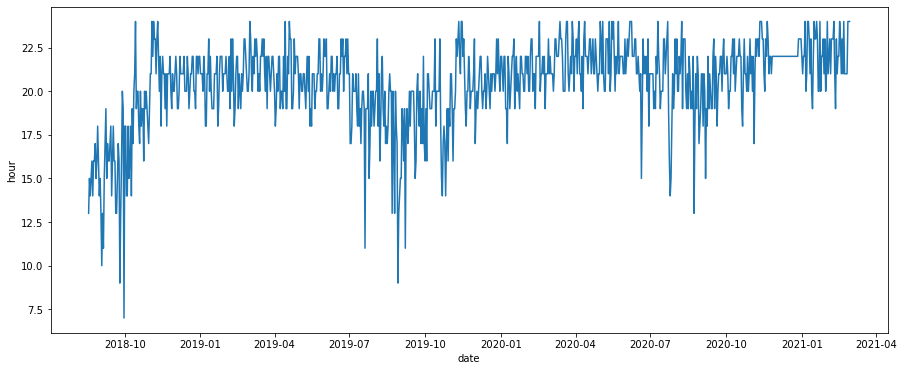

In [19]:
plt.figure(figsize=(15,6))
sns.lineplot(data=by_date, x=by_date.index, y='hour')

## group by hour

In [21]:
by_hour = train.groupby('hour').agg({'date':'count', 'demand':'mean'})
by_hour

,date,demand
hour,,
0,726,58.115702
1,587,55.039182
2,553,56.443038
3,287,54.891986
4,325,50.683077
5,338,49.097633
6,679,50.197349
7,806,59.585608
8,870,64.134483


### count of dates

<AxesSubplot:xlabel='hour', ylabel='date'>

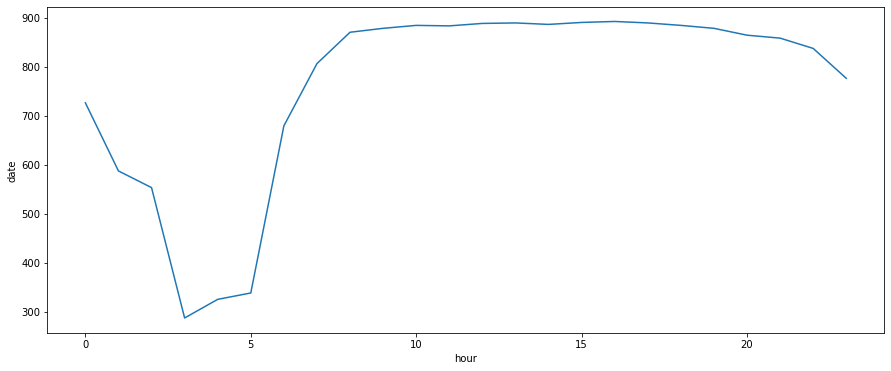

In [22]:
plt.figure(figsize=(15,6))
sns.lineplot(data=by_hour, x=by_hour.index, y='date')

### mean demand by hour

<AxesSubplot:xlabel='hour', ylabel='demand'>

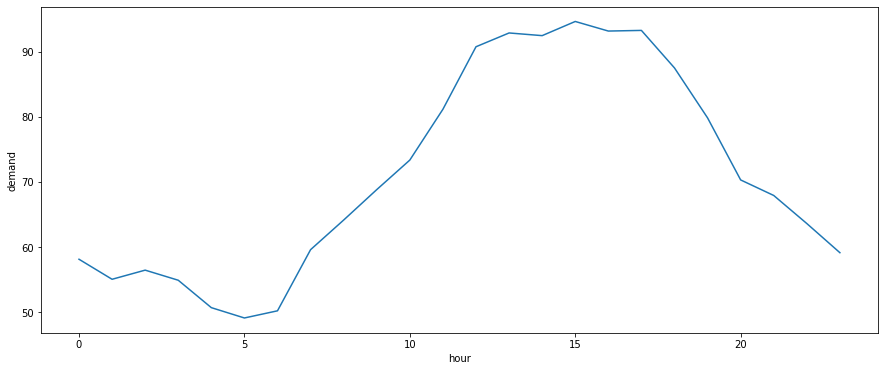

In [23]:
plt.figure(figsize=(15,6))
sns.lineplot(data=by_hour, x=by_hour.index, y='demand')

In [24]:
train

,date,hour,demand,date_hour
0,2018-08-18,9,91,2018-08-18 09:00:00
1,2018-08-18,10,21,2018-08-18 10:00:00
2,2018-08-18,13,23,2018-08-18 13:00:00
3,2018-08-18,14,104,2018-08-18 14:00:00
4,2018-08-18,15,81,2018-08-18 15:00:00
...,...,...,...,...
18242,2021-02-28,19,95,2021-02-28 19:00:00
18243,2021-02-28,20,88,2021-02-28 20:00:00
18244,2021-02-28,21,39,2021-02-28 21:00:00
18245,2021-02-28,22,104,2021-02-28 22:00:00


<AxesSubplot:xlabel='date_hour', ylabel='demand'>

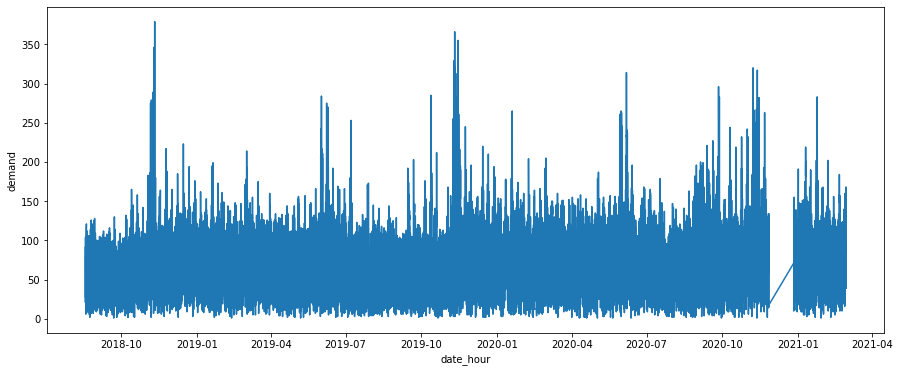

In [25]:
plt.figure(figsize=(15,6))
sns.lineplot(data=train, x='date_hour', y='demand')

# pre-processing

In [46]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [47]:
from sktime.forecasting.base import ForecastingHorizon

In [150]:
train['year'] = train['date'].dt.year

In [151]:
train['month'] = train['date'].dt.month

In [152]:
train['day'] = train['date'].dt.day

In [153]:
test['year'] = test['date'].dt.year

In [49]:
test['month'] = test['date'].dt.month

In [50]:
test['day'] = test['date'].dt.day

In [139]:
train.set_index('date_hour', inplace=True)

In [172]:
train_new = train[train.index < pd.Timestamp('2020-11-01')]

<AxesSubplot:xlabel='date_hour', ylabel='demand'>

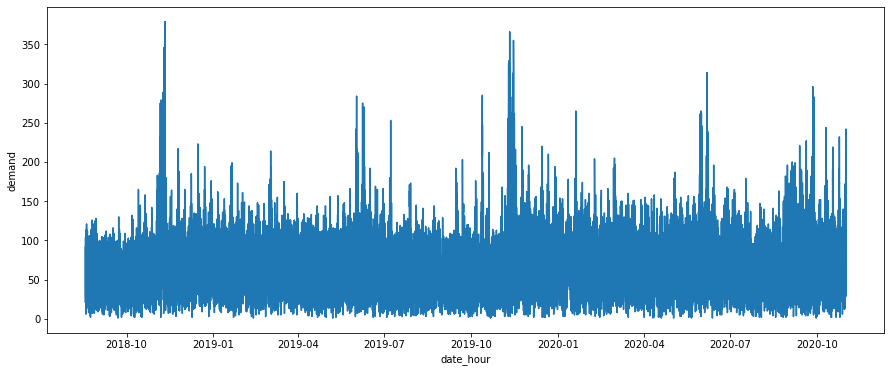

In [173]:
plt.figure(figsize=(15,6))
sns.lineplot(data=train_new, x='date_hour', y='demand')

## reindexing

In [174]:
train_new.nunique()

date      805
hour       24
demand    286
year        3
month      12
day        31
dtype: int64

In [178]:
train_new

,date,hour,demand,year,month,day
date_hour,,,,,,
2018-08-18 09:00:00,2018-08-18,9,91,2018,8,18
2018-08-18 10:00:00,2018-08-18,10,21,2018,8,18
2018-08-18 13:00:00,2018-08-18,13,23,2018,8,18
2018-08-18 14:00:00,2018-08-18,14,104,2018,8,18
2018-08-18 15:00:00,2018-08-18,15,81,2018,8,18
...,...,...,...,...,...,...
2020-10-31 19:00:00,2020-10-31,19,110,2020,10,31
2020-10-31 20:00:00,2020-10-31,20,29,2020,10,31
2020-10-31 21:00:00,2020-10-31,21,59,2020,10,31


In [139]:
train.set_index('date_hour', inplace=True)

In [179]:
train_all = train_new.reindex(pd.date_range(train_new.index.min(), train_new.index.max(), freq='H'))

In [180]:
train_all['demand'].isna().sum()

3081

In [181]:
train_all.fillna(method='ffill', inplace=True)

In [198]:
y = train_all['demand']

In [199]:
y

2018-08-18 09:00:00     91.0
2018-08-18 10:00:00     21.0
2018-08-18 11:00:00     21.0
2018-08-18 12:00:00     21.0
2018-08-18 13:00:00     23.0
                       ...  
2020-10-31 19:00:00    110.0
2020-10-31 20:00:00     29.0
2020-10-31 21:00:00     59.0
2020-10-31 22:00:00    100.0
2020-10-31 23:00:00     72.0
Freq: H, Name: demand, Length: 19335, dtype: float64

In [200]:
y_train, y_test = temporal_train_test_split(y, test_size=.2)

In [201]:
y_test.shape

(3867,)

In [202]:
y_train

2018-08-18 09:00:00     91.0
2018-08-18 10:00:00     21.0
2018-08-18 11:00:00     21.0
2018-08-18 12:00:00     21.0
2018-08-18 13:00:00     23.0
                       ...  
2020-05-23 16:00:00    151.0
2020-05-23 17:00:00     85.0
2020-05-23 18:00:00     67.0
2020-05-23 19:00:00     65.0
2020-05-23 20:00:00     89.0
Freq: H, Name: demand, Length: 15468, dtype: float64

In [203]:
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [204]:
fh

ForecastingHorizon(['2020-05-23 21:00:00', '2020-05-23 22:00:00',
               '2020-05-23 23:00:00', '2020-05-24 00:00:00',
               '2020-05-24 01:00:00', '2020-05-24 02:00:00',
               '2020-05-24 03:00:00', '2020-05-24 04:00:00',
               '2020-05-24 05:00:00', '2020-05-24 06:00:00',
               ...
               '2020-10-31 14:00:00', '2020-10-31 15:00:00',
               '2020-10-31 16:00:00', '2020-10-31 17:00:00',
               '2020-10-31 18:00:00', '2020-10-31 19:00:00',
               '2020-10-31 20:00:00', '2020-10-31 21:00:00',
               '2020-10-31 22:00:00', '2020-10-31 23:00:00'],
              dtype='datetime64[ns]', length=3867, freq='H', is_relative=False)

# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
y_train, y_test, X_train, X_test = temporal_train_test_split(y, train_all[['year', 'month', 'day', 'hour']], test_size=.2)

In [62]:
lr = LinearRegression()

In [63]:
lr.fit(X_train, y_train)

LinearRegression()

In [64]:
pred = lr.predict(X_test)

In [65]:
mean_squared_error(y_test, pred, squared=False)

48.262583209164795

In [66]:
lr.coef_

array([ 2.60523271,  0.3782185 , -0.17297553,  1.01083197])

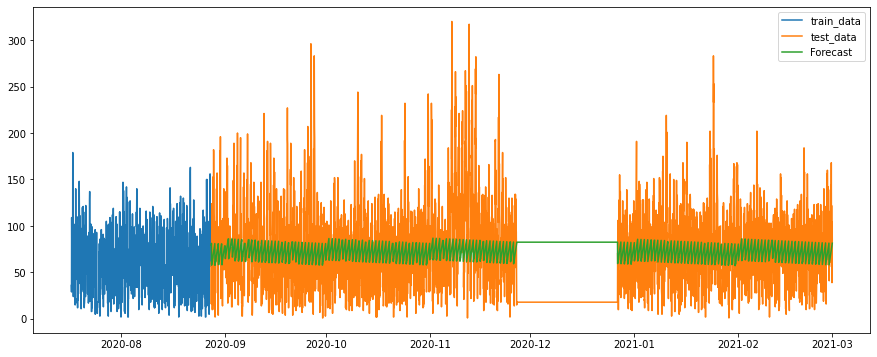

In [67]:
plt.figure(figsize=(15,6))
plt.plot(y_train.index[-1000:],y_train.values[-1000:], label='train_data')
plt.plot(y_test.index,y_test.values, label='test_data')
plt.plot(y_test.index,pred, label='Forecast')
plt.legend(loc='best')
plt.show()

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [206]:
y_train, y_test, X_train, X_test = temporal_train_test_split(y, train_all[['year', 'month', 'day', 'hour']], test_size=.2)

In [213]:
rf = RandomForestRegressor(n_estimators=500, max_depth=8, min_samples_split=10)

In [214]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=10, n_estimators=500)

In [215]:
rf.score(X_train, y_train)

0.36105202152010396

In [216]:
rf.score(X_test, y_test)

0.1289606348925778

In [217]:
pred = rf.predict(X_test)

In [218]:
mean_squared_error(y_test, pred, squared=False)

38.78133313254451

In [219]:
rf.feature_importances_

array([0.04764021, 0.27719457, 0.27169824, 0.40346698])

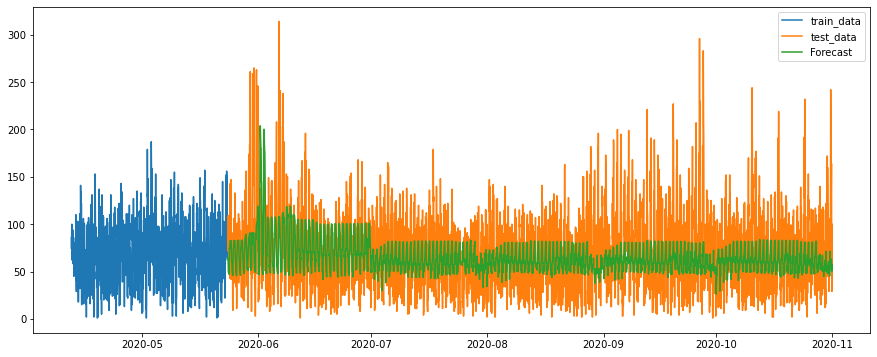

In [220]:
plt.figure(figsize=(15,6))
plt.plot(y_train.index[-1000:],y_train.values[-1000:], label='train_data')
plt.plot(y_test.index,y_test.values, label='test_data')
plt.plot(y_test.index,pred, label='Forecast')
plt.legend(loc='best')
plt.show()

# Naive

In [221]:
from sktime.forecasting.naive import NaiveForecaster

In [222]:
naive = NaiveForecaster(strategy='mean', window_length=15)

In [223]:
naive.fit(y_train, fh=fh)

NaiveForecaster(strategy='mean', window_length=15)

In [224]:
y_train.index.freq = 'H'

In [225]:
pred = naive.predict(fh=fh)

C:\Users\dsanr\anaconda3\lib\site-packages\sktime\forecasting\base\_fh.py:601: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
C:\Users\dsanr\anaconda3\lib\site-packages\sktime\forecasting\base\_fh.py:611: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
C:\Users\dsanr\anaconda3\lib\site-packages\sktime\utils\datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
C:\Users\dsanr\anaconda3\lib\site-packages\sktime\utils\datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
C:\Users\dsanr\anaconda3\lib\site-packages\sktime\utils\datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
C:\Us

In [226]:
mean_squared_error(y_test, pred, squared=False)

52.901172910783444

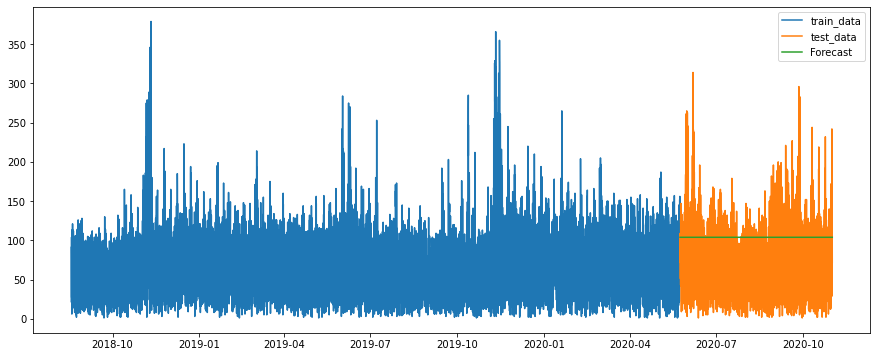

In [227]:
plt.figure(figsize=(15,6))
plt.plot(y_train.index,y_train.values, label='train_data')
plt.plot(y_test.index,y_test.values, label='test_data')
plt.plot(y_test.index,pred, label='Forecast')
plt.legend(loc='best')
# plt.title("Weighted Moving Average Method")
plt.show()

# Exponential Smoothing

In [228]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [238]:
es = ExponentialSmoothing(trend=None, seasonal='mul', sp=24, smoothing_trend=.1)

In [239]:
es.fit(y_train)

ExponentialSmoothing(seasonal='mul', smoothing_trend=0.1, sp=24)

In [240]:
pred = es.predict(fh=fh)

C:\Users\dsanr\anaconda3\lib\site-packages\sktime\utils\datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
C:\Users\dsanr\anaconda3\lib\site-packages\sktime\utils\datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
C:\Users\dsanr\anaconda3\lib\site-packages\sktime\utils\datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
C:\Users\dsanr\anaconda3\lib\site-packages\sktime\utils\datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  return x.freqstr


In [241]:
mean_squared_error(y_test, pred, squared=False)

39.813319338926526

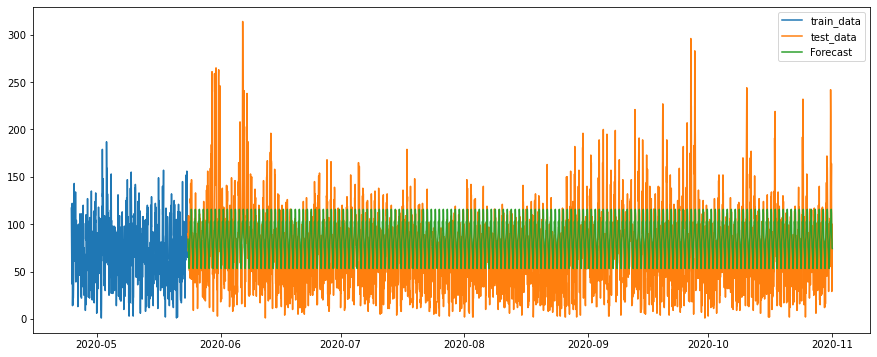

In [242]:
plt.figure(figsize=(15,6))
plt.plot(y_train.index[-700:],y_train.values[-700:], label='train_data')
plt.plot(y_test.index,y_test.values, label='test_data')
plt.plot(y_test.index,pred, label='Forecast')
plt.legend(loc='best')
# plt.title("Weighted Moving Average Method")
plt.show()

# ARIMA

In [243]:
from scipy.stats import boxcox

In [244]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

In [245]:
from sktime.utils.plotting import plot_correlations

In [246]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult

In [247]:
adfuller(train_all['demand'])

(-12.637754208929454,
 1.4573586258888784e-23,
 45,
 19289,
 {'1%': -3.4306890621831307,
  '5%': -2.8616898532640866,
  '10%': -2.566849762850694},
 188530.28599971667)

In [248]:
train_all

,date,hour,demand,year,month,day
2018-08-18 09:00:00,2018-08-18,9.0,91.0,2018.0,8.0,18.0
2018-08-18 10:00:00,2018-08-18,10.0,21.0,2018.0,8.0,18.0
2018-08-18 11:00:00,2018-08-18,10.0,21.0,2018.0,8.0,18.0
2018-08-18 12:00:00,2018-08-18,10.0,21.0,2018.0,8.0,18.0
2018-08-18 13:00:00,2018-08-18,13.0,23.0,2018.0,8.0,18.0
...,...,...,...,...,...,...
2020-10-31 19:00:00,2020-10-31,19.0,110.0,2020.0,10.0,31.0
2020-10-31 20:00:00,2020-10-31,20.0,29.0,2020.0,10.0,31.0
2020-10-31 21:00:00,2020-10-31,21.0,59.0,2020.0,10.0,31.0
2020-10-31 22:00:00,2020-10-31,22.0,100.0,2020.0,10.0,31.0


In [250]:
decompose = seasonal_decompose(train_all['demand'])

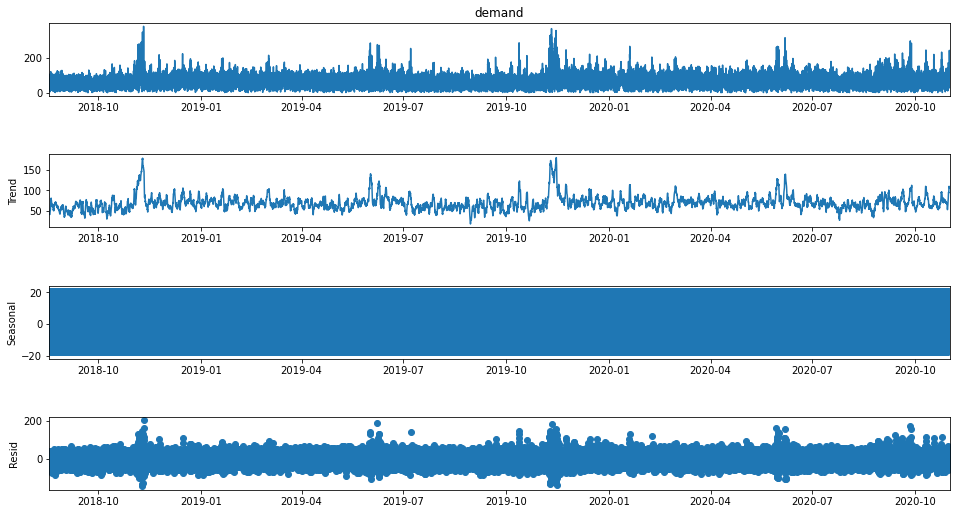

In [251]:
fig = decompose.plot()
fig.set_size_inches(15,8)

<AxesSubplot:>

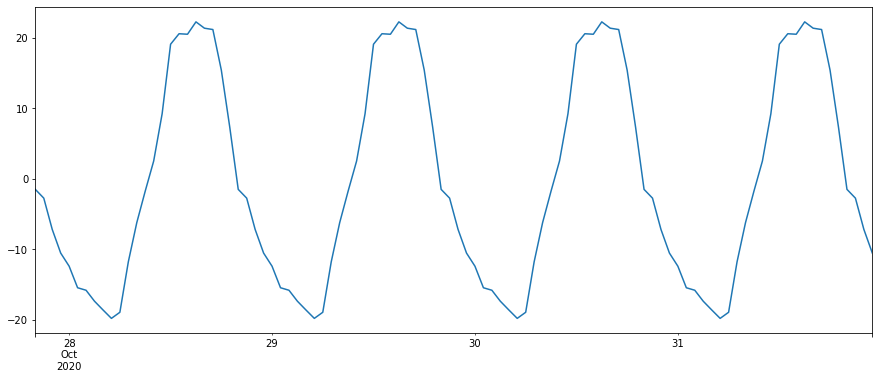

In [261]:
decompose.seasonal[-100:].plot(figsize=(15,6))

<AxesSubplot:>

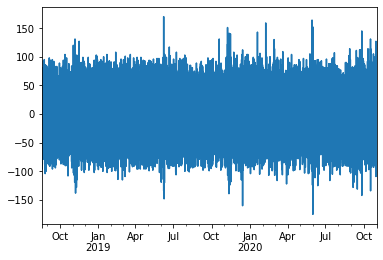

In [262]:
train_all['demand'].diff(1).plot()

In [263]:
test.reindex(pd.date_range(test['date_hour'].min(), test['date_hour'].max(), freq='H'))

,date,hour,date_hour,year,month,day
2021-03-01 00:00:00,NaT,NaN,NaT,NaN,NaN,NaN
2021-03-01 01:00:00,NaT,NaN,NaT,NaN,NaN,NaN
2021-03-01 02:00:00,NaT,NaN,NaT,NaN,NaN,NaN
2021-03-01 03:00:00,NaT,NaN,NaT,NaN,NaN,NaN
2021-03-01 04:00:00,NaT,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-03-28 19:00:00,NaT,NaN,NaT,NaN,NaN,NaN
2022-03-28 20:00:00,NaT,NaN,NaT,NaN,NaN,NaN
2022-03-28 21:00:00,NaT,NaN,NaT,NaN,NaN,NaN
2022-03-28 22:00:00,NaT,NaN,NaT,NaN,NaN,NaN


(<Figure size 864x576 with 3 Axes>,
 array([<AxesSubplot:ylabel='demand'>,
        <AxesSubplot:title={'center':'Autocorrelation'}>,
        <AxesSubplot:title={'center':'Partial Autocorrelation'}>],
       dtype=object))

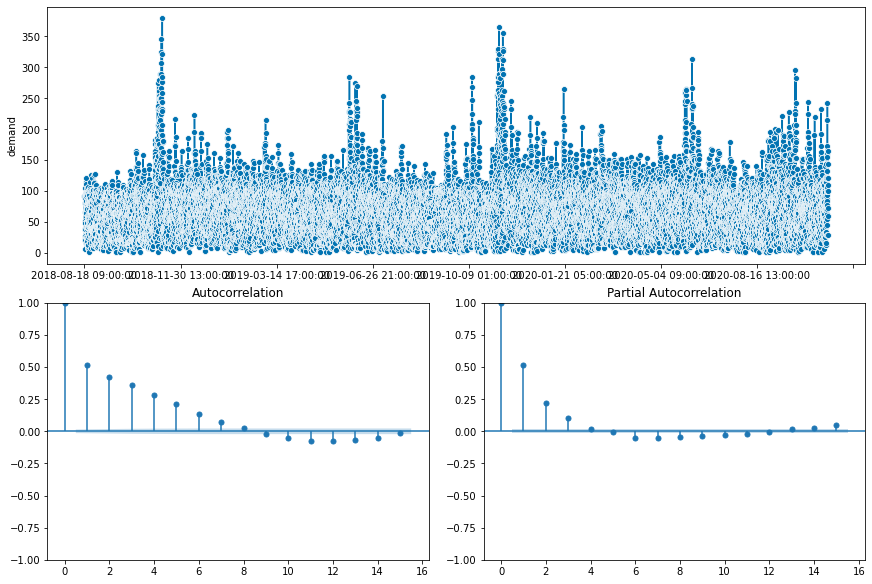

In [264]:
plot_correlations(train_all['demand'], lags=15)

(<Figure size 864x576 with 3 Axes>,
 array([<AxesSubplot:ylabel='demand'>,
        <AxesSubplot:title={'center':'Autocorrelation'}>,
        <AxesSubplot:title={'center':'Partial Autocorrelation'}>],
       dtype=object))

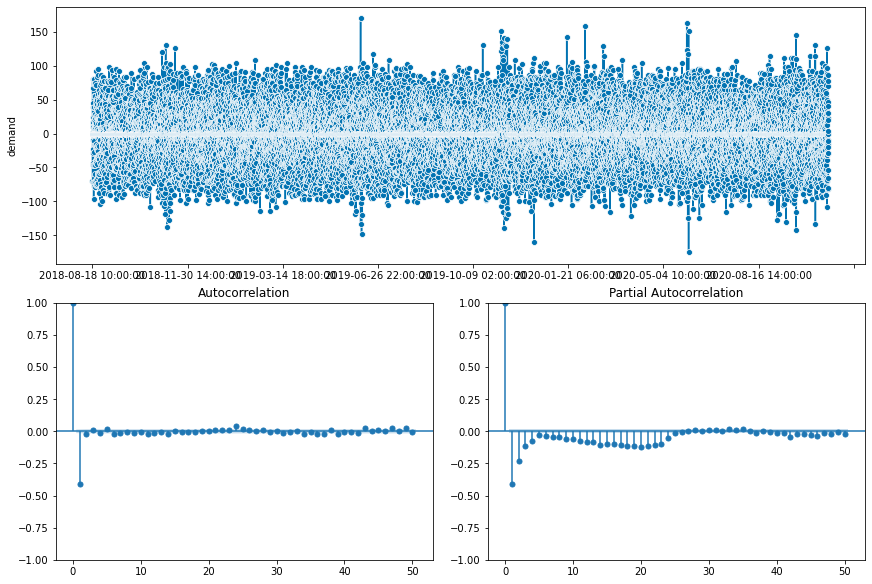

In [265]:
plot_correlations(train_all['demand'].diff().dropna(), lags=50)

In [271]:
arima = ARIMA(order=(4,1,1),seasonal_order=(0,1,1,24), maxiter=300)

In [272]:
arima.fit(y_train)

ARIMA(maxiter=300, order=(4, 1, 1), seasonal_order=(0, 1, 1, 24))

In [273]:
pred = arima.predict(fh=fh)

C:\Users\dsanr\anaconda3\lib\site-packages\sktime\forecasting\base\_fh.py:601: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
C:\Users\dsanr\anaconda3\lib\site-packages\sktime\forecasting\base\_fh.py:611: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
C:\Users\dsanr\anaconda3\lib\site-packages\sktime\utils\datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
C:\Users\dsanr\anaconda3\lib\site-packages\sktime\utils\datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
C:\Users\dsanr\anaconda3\lib\site-packages\sktime\utils\datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
C:\Us

In [274]:
mean_squared_error(y_test, pred, squared=False)

41.082078065491714

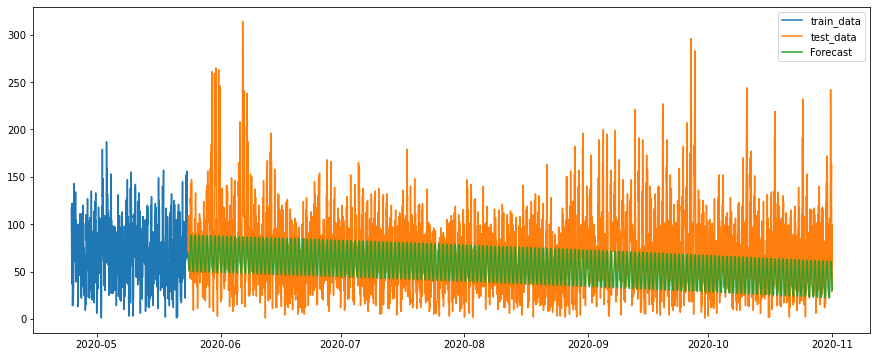

In [275]:
plt.figure(figsize=(15,6))
plt.plot(y_train.index[-700:], y_train.values[-700:], label='train_data')
plt.plot(y_test.index, y_test.values, label='test_data')
plt.plot(y_test.index, pred, label='Forecast')
plt.legend(loc='best')
# plt.title("Weighted Moving Average Method")
plt.show()

# Predictions for test

In [250]:
test

,date,hour,date_hour,year,month,day
0,2021-03-01,0,2021-03-01 00:00:00,2021,3,1
1,2021-03-01,1,2021-03-01 01:00:00,2021,3,1
2,2021-03-01,2,2021-03-01 02:00:00,2021,3,1
3,2021-03-01,3,2021-03-01 03:00:00,2021,3,1
4,2021-03-01,5,2021-03-01 05:00:00,2021,3,1
...,...,...,...,...,...,...
7645,2022-03-28,19,2022-03-28 19:00:00,2022,3,28
7646,2022-03-28,20,2022-03-28 20:00:00,2022,3,28
7647,2022-03-28,21,2022-03-28 21:00:00,2022,3,28
7648,2022-03-28,22,2022-03-28 22:00:00,2022,3,28


In [251]:
test.columns

Index(['date', 'hour', 'date_hour', 'year', 'month', 'day'], dtype='object')

In [254]:
predictions = rf.predict(test[['year', 'month', 'day', 'hour']])

In [255]:
predictions

array([61.59710729, 50.13537162, 52.13795354, ..., 81.68650537,
       66.12441082, 60.77053686])

In [256]:
result = pd.DataFrame({'date':test['date'], 'hour':test['hour'], 'demand':predictions})
result

,date,hour,demand
0,2021-03-01,0,61.597107
1,2021-03-01,1,50.135372
2,2021-03-01,2,52.137954
3,2021-03-01,3,53.542309
4,2021-03-01,5,49.659951
...,...,...,...
7645,2022-03-28,19,97.140004
7646,2022-03-28,20,93.517691
7647,2022-03-28,21,81.686505
7648,2022-03-28,22,66.124411


In [257]:
result[result['demand'] < 0].index

Int64Index([], dtype='int64')

In [258]:
result['demand'].mean()

74.17754859828398

In [259]:
result.to_csv(r'D:\projects\AV\jobathon 2022 04\submission.csv', index=False)